# DS6503 Data Mining Tools and Techniques

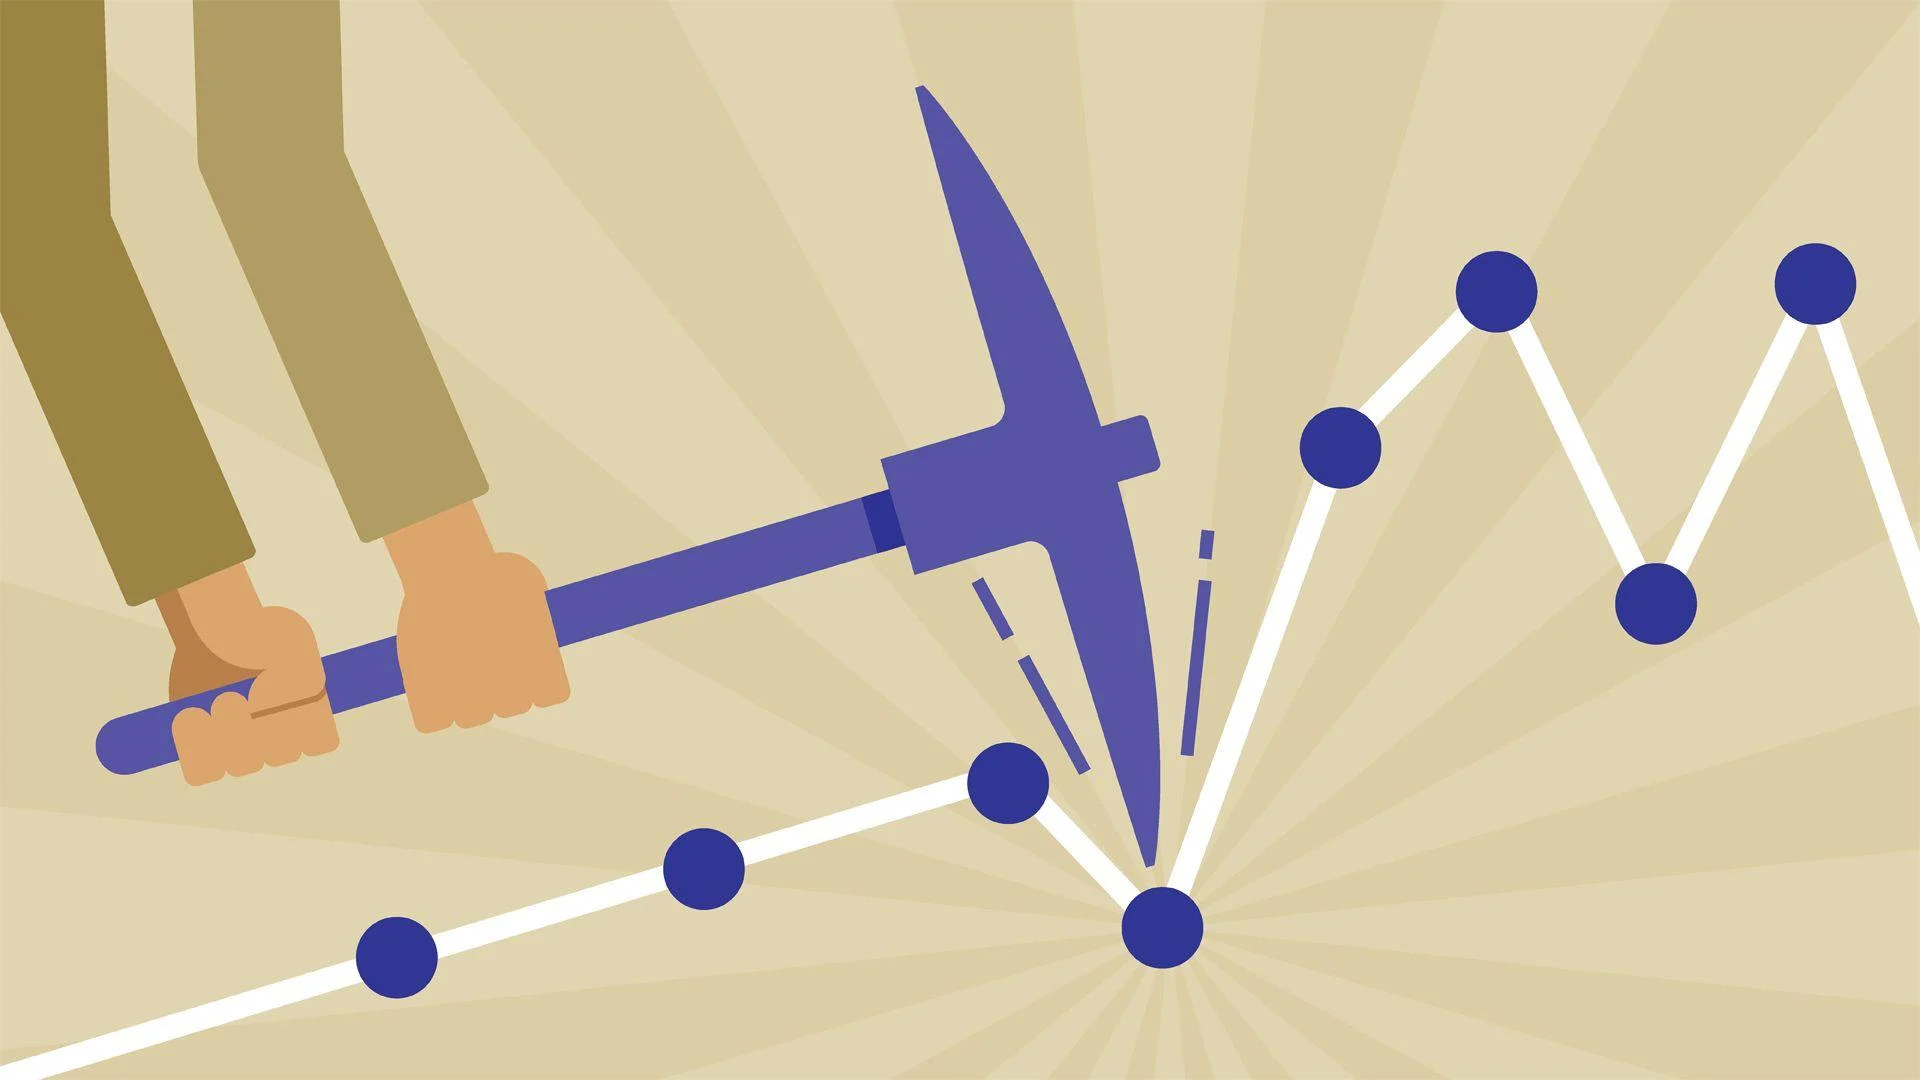

## Dimensionality Reduction and Clustering

Dimensionality Reduction and Clustering are data mining techniques used to reduce the number of variables and to create clusters based similarities, respectively.

### 1. `Principal Component Analysis (PCA)`

[Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is linear dimensionality reduction technique that transforms data into a new coordinate system by finding the directions (principal components) that maximize variance.
It is often used to reduce the dimensionality of high-dimensional data by transforming a large set of variables into a smaller one while still retaining most sample’s important informatio



### 2. `t-Distributed Stochastic Neighbor Embeddingr (t-SNE)`

[t-Distributed Stochastic Neighbor Embedding (t-SNE)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) is a non-linear dimensionality reduction technique that focuses on preserving the local structure of the data, converting high-dimensional Euclidean distances into conditional probabilities. t-SNE can capture complex, non-linear relationships between data points. It is excellent for visualizing clusters and local patterns.

### 3. `Linear Discriminant Analysis (LDA)`

[Linear Discriminant Analysis (LDA)](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) is a generalization of Fisher's linear discriminant, a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events.

### 4. `k-Means Clustering`

[k-Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) is a unsupervised method that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

## Practice 6

## 1. Dimensionality Reduction with `PCA` technique

**Q1: Reduce the dimensionality of the `Iris` dataset (from `scikit-learn`) using PCA and visualize the results. Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
```

**Answer**:

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

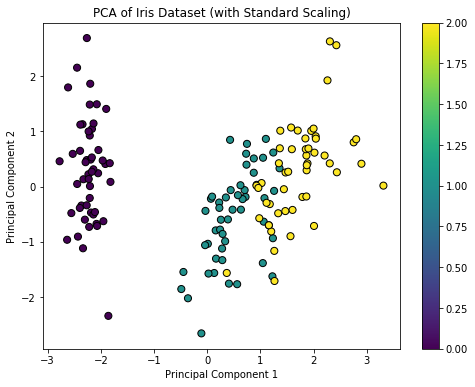

In [8]:
# Applying standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Plot the transformed data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Iris Dataset (with Standard Scaling)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

**Q2: Determine the number of principal components required to explain 90% of the variance in the `Wine` dataset (from `scikit-learn`). Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_wine
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target
```

**Answer**:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.datasets import load_wine
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

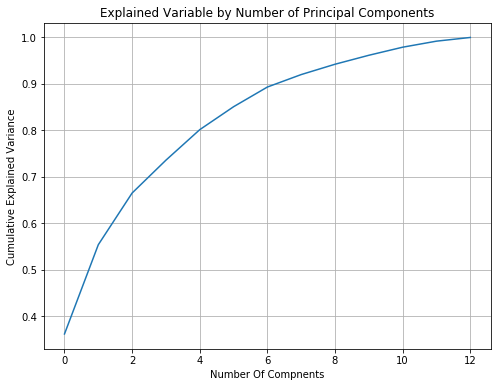

In [18]:
# Applying standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA
pca = PCA()
X_scaled = pca.fit_transform(X_scaled)

# Plotting the transformed data
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variable by Number of Principal Components')
plt.xlabel('Number Of Compnents')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [19]:
# Determining number of principal components to explain 90% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_)>= 0.90) + 1
print(f'Number of components required to explain 90% variance: {n_components}')

Number of components required to explain 90% variance: 8


**Q3: Use PCA to reduce noise in the `Digits` dataset (from `scikit-learn`) by retaining 95% of the variance and compare original and reconstructed images. Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_digits
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target
```

**Answer**:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.datasets import load_digits
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [7]:
# Applying standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Reconstructing images from the reduced dimension
X_reconstructed = pca.inverse_transform(X_pca)

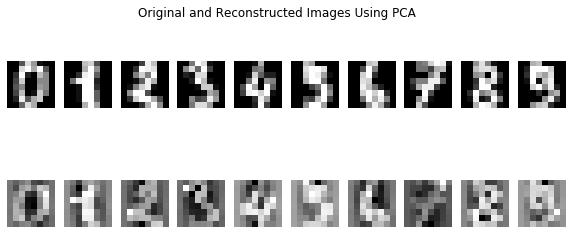

In [13]:
# Comparing the original and reconstructed images
n_images = 10
plt.figure(figsize=(10, 4))
for i in range(n_images):
    # Original images
    plt.subplot(2, n_images, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.axis('off')
    
    # Reconstructed images
    plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(X_reconstructed[i].reshape(8, 8), cmap='gray')
    plt.axis('off')

plt.suptitle('Original and Reconstructed Images Using PCA')
plt.show()

**Q4: Use PCA for feature selection on the `Breast Cancer` dataset (from `scikit-learn`) and train a logistic regression model using the top 5 principal components. Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_breast_cancer
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
```

**Answer**:

In [18]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.datasets import load_breast_cancer
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [22]:
# Apply standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA and selecting thr top 5 principle components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Training a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3,random_state= 42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with top 5 principal components:{accuracy}')

Accuracy with top 5 principal components:0.9883040935672515


---

## 2. Dimensionality Reduction with `t-SNE` technique

**Q1: Reduce the dimensionality of the `Iris` dataset (from `scikit-learn`) using t-SNE and visualize the results. Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
```

**Answer**:

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

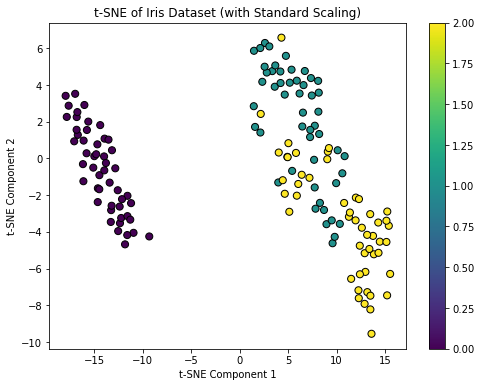

In [27]:
# Applying standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA to reduce the dataset to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=300,random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

#Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE of Iris Dataset (with Standard Scaling)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

**Q2: Explore the effect of different "`perplexity`" values on the t-SNE embeddings of the `MNIST` dataset (from `scikit-learn`). Please use the script below to load the dataset.**

```python
from sklearn.datasets import fetch_openml
# Load the MNIST dataset (first 1000 samples for faster computation)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:1000]
y = mnist.target[:1000].astype(int)
```

**Answer**:

In [32]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [33]:
from sklearn.datasets import fetch_openml
# Load the MNIST dataset (first 1000 samples for faster computation)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:1000]
y = mnist.target[:1000].astype(int)

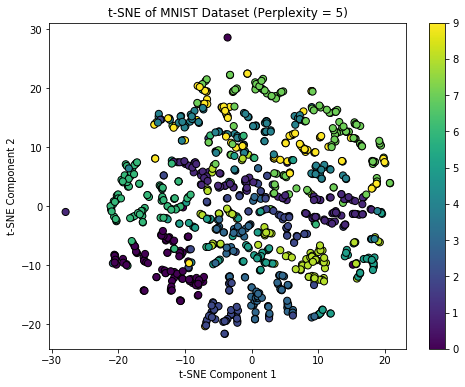

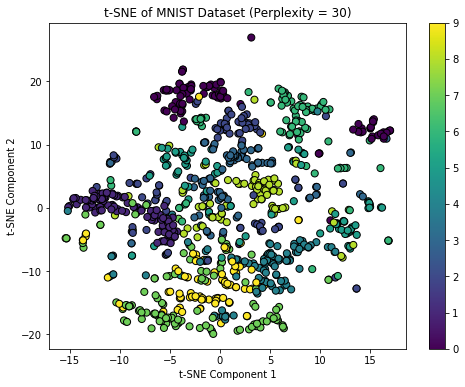

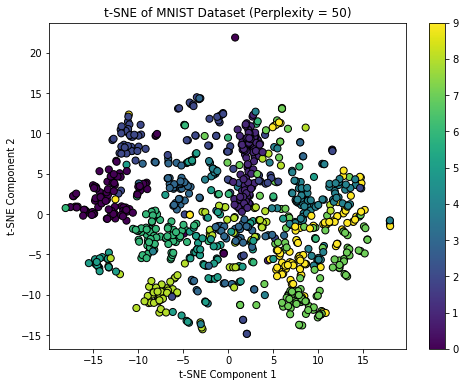

In [34]:
# Applying standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing t-SNE to reduce the dataset to 2 dimensions
perplexities = [5, 30, 50]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Plotting the result
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE of MNIST Dataset (Perplexity = {perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar()
    plt.show()

**Q3: Use t-SNE to reduce the dimensionality of high-dimensional text data and visualize the clusters. Please use the script below to load the dataset.**

```python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(newsgroups.data).toarray()
y = newsgroups.target
```

**Answer**:

In [22]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(newsgroups.data).toarray()
y = newsgroups.target

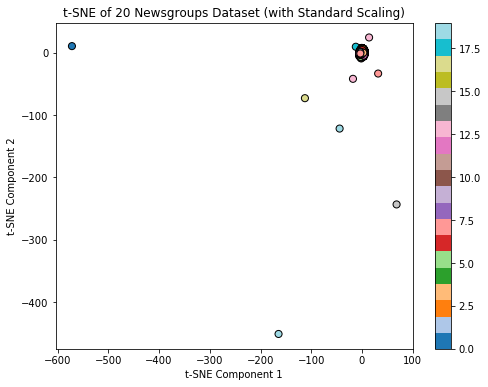

In [25]:
# Apply standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE to reduce the data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab20', edgecolor='k', s=50)
plt.title('t-SNE of 20 Newsgroups Dataset (with Standard Scaling)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

**Q4: Compare the results of PCA and t-SNE on the `Fashion MNIST` dataset (from `scikit-learn`). Please use the script below to load the dataset.**

```python
from sklearn.datasets import fetch_openml
# Load the Fashion MNIST dataset (first 1000 samples for faster computation)
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
X = fashion_mnist.data[:1000]
y = fashion_mnist.target[:1000].astype(int)
```

**Answer**:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.datasets import fetch_openml
# Load the Fashion MNIST dataset (first 1000 samples for faster computation)
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
X = fashion_mnist.data[:1000]
y = fashion_mnist.target[:1000].astype(int)

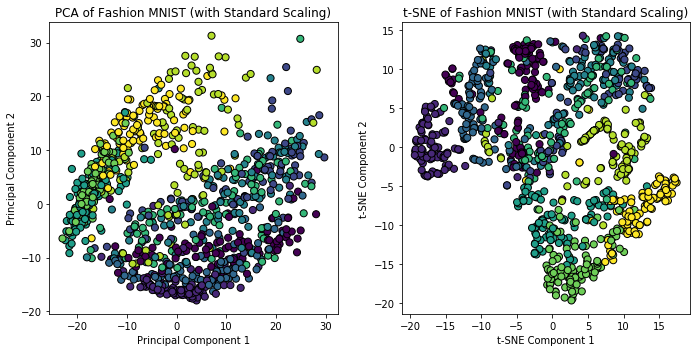

In [35]:
# Apply standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot and compare the results 
plt.figure (figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Fashion MNIST (with Standard Scaling)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE of Fashion MNIST (with Standard Scaling)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

---

## 3. Dimensionality Reduction with `LDA` technique

**Q1: Reduce the dimensionality of the `Iris` (from `scikit-learn`) using DLA and visualize the results. Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
```

**Answer**:

In [29]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

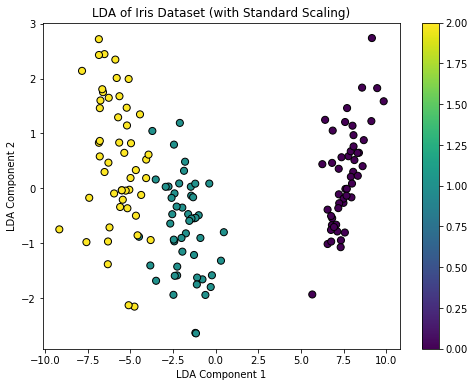

In [31]:
# Apply standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform LDA to reduce the dataset to 2 dimensions
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA of Iris Dataset (with Standard Scaling)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar()
plt.show()

**Q2: Use LDA for dimensionality reduction and train a logistic regression model for classification on the `Wine` dataset (from `scikit-learn`). Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_wine
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target
```

**Answer**:

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.datasets import load_wine
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

In [38]:

# Apply standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform LDA to reduce the dataset to 2 dimensions
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Train a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with the LDA components: {accuracy}')

Accuracy with LDA components: 1.0


**Q3: Use LDA to visualize class separation in the `Iris` dataset. Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
```

**Answer**:

In [45]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

In [46]:
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

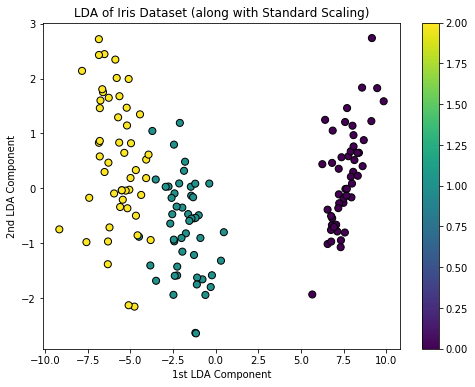

In [48]:
# Apply standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform LDA to reduce the dataset to 2 dimensions
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA of Iris Dataset (along with Standard Scaling)')
plt.xlabel('1st LDA Component')
plt.ylabel('2nd LDA Component')
plt.colorbar()
plt.show()

**Q4: Compare the results of PCA and LDA on the `Iris` dataset. Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
```

**Answer**:

In [49]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

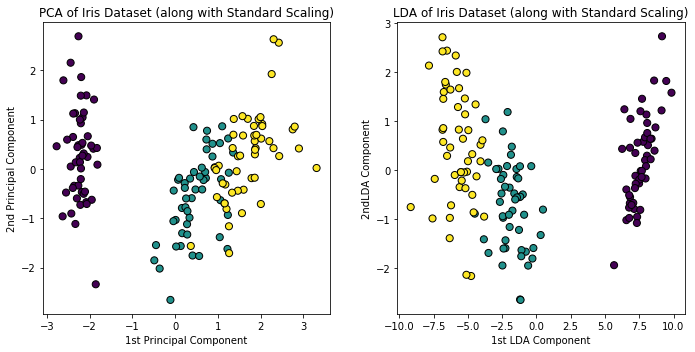

In [52]:
# Apply standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plot and compare the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Iris Dataset (along with Standard Scaling)')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA of Iris Dataset (along with Standard Scaling)')
plt.xlabel('1st LDA Component')
plt.ylabel('2ndLDA Component')

plt.tight_layout()
plt.show()

## 4. Clustering with the `k-Means Clustering` algorithm

**Q1: Perform k-means clustering on the `Iris` dataset and visualize the clusters. Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
```

**Answer:**

In [53]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
from sklearn.datasets import load_iris
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

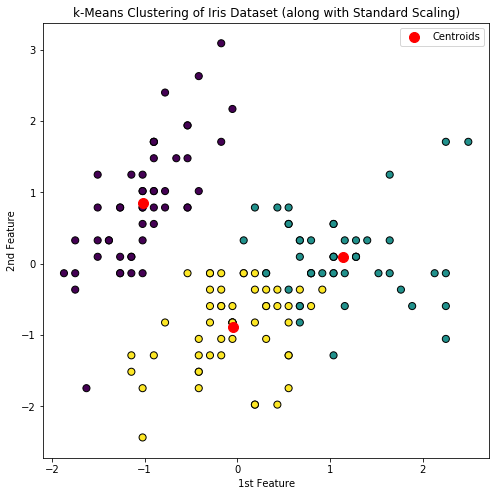

In [59]:
# Applying the standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing the k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plotting the clustering results
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('k-Means Clustering of Iris Dataset (along with Standard Scaling)')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.legend()
plt.show()

**Q2: Determine the optimal number of clusters (k) for the `Wine` dataset (from `scikit-learn`). Please use the script below to load the dataset.**

```python
from sklearn.datasets import load_wine
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target
```

**Answer**:

In [61]:
import  matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [62]:
from sklearn.datasets import load_wine
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

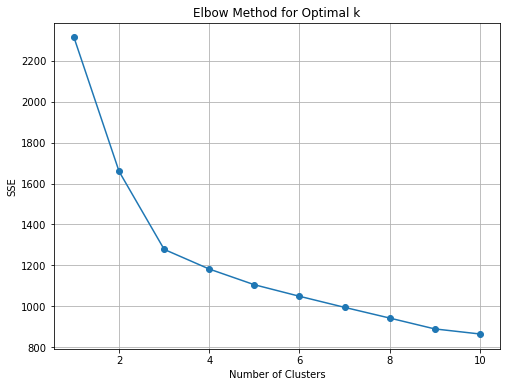

In [63]:
# Applying standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the elbow method to determine the optimal number of clusters (k)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## END